# Introduction to Julia

Julia is a recent programming language that aims at combining high performance with ease of use. It is increasingly popular in the optimization community.

## 0. Preliminaries

In this Jupyter notebook, you have access to a structured equivalent of Julia's REPL, i.e. the interactive console. Here, you can divide your code in cells to modify and run each one separately (use `Shift`+`Enter` to run a cell and move to the next one). By default, the output of a cell is the value of its last expression, you can hide it by ending the cell with `;`.

In [1]:
1 + 2

3

**This tutorial is quite long, especially the first part. If you want, you can skip directly to part 2 or even 3, and come back to the beginning when you don't know how to do something.**

Although we will introduce some useful commands, we cannot describe all of them. A very good summary can be found at https://juliadocs.github.io/Julia-Cheat-Sheet/, and we will often refer the reader to it.

### Differences with Python

For those who already master Python, here are the key novelties of Julia:
- Even though they are not necessary, types are heavily used to make the code both clearer and faster.
- There are no classes, only "structures" which contain data but no methods.
- Blocks are not based on indentation but delimited by the `end` keyword.
- Array indexing starts at `a[1]` instead of `a[0]`, and ranges `i:j` include the last index.
- Vectorizing the code doesn't improve its speed.

A more exhaustive list is available at https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-Python.

### Compilation

When you run a chunk of code for the first time, it takes longer due to compilation. Don't be surprised, it is fundamental to Julia's performance, and the following runs are much faster.

### Imports

A package can be imported with the keyword `using ...`, which makes all of its functions available without prefix (similar to the Python code `from ... import *`). If you want to keep prefixes, use `import ...` instead.

Before a package can be imported, it must be installed. Here we install all the packages we will need during this tutorial. The following cell may take a while to run, especially with a slow internet connection.

In [2]:
using Pkg
Pkg.update()
Pkg.add([
        "BenchmarkTools",
        "GLPK",
        "GraphPlot",
        "JuMP",
        "LightGraphs",
        "PyPlot",
])

   Updating registry at `C:\Users\Wael\.julia\registries\General`
  Installed JSONSchema ───────── v0.3.3
  Installed Compat ───────────── v3.25.0
  Installed ArnoldiMethod ────── v0.0.2
  Installed GLPK ─────────────── v0.14.4
  Installed Plots ────────────── v1.10.0
  Installed Atom ─────────────── v0.12.30
  Installed LightGraphs ──────── v1.3.4
  Installed Requires ─────────── v1.1.2
  Installed MutableArithmetics ─ v0.2.13
  Installed JLLWrappers ──────── v1.1.4
  Installed NaNMath ──────────── v0.3.5
  Installed FlameGraphs ──────── v0.2.5
  Installed Contour ──────────── v0.5.7
  Installed Formatting ───────── v0.4.2
  Installed JuliaInterpreter ─── v0.8.8
  Installed Tables ───────────── v1.2.2
  Installed URIs ─────────────── v1.1.0
  Installed DiffResults ──────── v1.0.3
  Installed FileIO ───────────── v1.4.5
  Installed StaticArrays ─────── v1.0.1
  Installed HTTP ─────────────── v0.9.2
  Installed Parsers ──────────── v1.0.15
  Installed Observables ──────── v0.3.3
  Insta

## 1. The basics

### Variables and elementary operations

Variable assignment works as one would expect. Note that you can use LaTeX symbols by typing (for instance) "\beta" + `Tab` in the REPL or a Jupyter cell. This also works for indices when typing "u\\_1" + `Tab`.

In [3]:
x = 1
ε = 0.1
u₁ = 10

10

Elementary operations are well summed up in https://juliadocs.github.io/Julia-Cheat-Sheet/. When comparing to Python, the main changes are boolean operators..

### Types

Like in Python, each variable in Julia has a type.

In [4]:
a = 1
b = 1.
c = '1'
d = "1"
typeof(a), typeof(b), typeof(c), typeof(d)

(Int64, Float64, Char, String)

Julia's typing system is dynamic, i.e. variables can change types, but performance can be increased by avoiding such changes and specifying the types when they are known in advance.

### Functions

The first function you need to master is for printing:

In [5]:
println("Hello world!")

Hello world!


More generally, a function is defined with the following syntax:

In [6]:
function addition(a, b)
    println("I am adding stuff")
    return a + b
end

addition (generic function with 1 method)

If we want, we can specify the types of the inputs and output:

In [7]:
function addition(a::Int, b::Int)::Int
    println("I am adding integers")
    return a + b
end

addition (generic function with 2 methods)

Note that there is still only one function `addition`, but it now has two "methods": one for integers, and one more generic.

In [8]:
methods(addition)

# 2 methods for generic function "addition":
[1] addition(a::Int64, b::Int64) in Main at In[7]:1
[2] addition(a, b) in Main at In[6]:1

This is linked to a key feature of Julia called *multiple dispatch*: the program will decide at runtime which function to apply depending on the type of the arguments.

In [9]:
addition(1, 2)

I am adding integers


3

In [10]:
addition(1, 0.5)

I am adding stuff


1.5

As in Python, you can add optional and keyword arguments.

### Arrays

Arrays can be created and extended just like in Python, using square brackets:

In [11]:
a = [3, 2]
push!(a, 1)
println(a)

[3, 2, 1]


However, if we know the type and size of the array in advance, it is better to allocate the memory first (with the `undef` object):

In [12]:
a = Array{Int, 1}(undef, 3)

3-element Array{Int64,1}:
 334500208
 334500240
 332800432

These random numbers are here because if we don't write any value in it, the array still contains whatever was in memory there before. We must therefore fill it:

In [13]:
a[1], a[2], a[3] = 3, 2, 1
println(a)

[3, 2, 1]


The syntax `Array{T, d}` denotes an array with element type `T` and `d` dimensions (or axes). For $d=1$ and $d=2$ we have shortcuts:

In [38]:
v = Vector{Float64}(undef, 2)
M = Matrix{Float64}(undef, 3, 2)

3×2 Array{Float64,2}:
 1.64886e-315  1.64886e-315
 1.64886e-315  1.64886e-315
 1.64886e-315  9.0e-323

Vectorizing a function `f` in Julia is done by adding a dot after its name.

In [15]:
function square(n::Int)::Int
    return n^2
end

square (generic function with 1 method)

In [16]:
square.(a)

3-element Array{Int64,1}:
 9
 4
 1

The same goes for elementary operators, except the dot comes before:

In [17]:
a.*2

3-element Array{Int64,1}:
 6
 4
 2

In [18]:
a.*2 .== a.^2

3-element BitArray{1}:
 0
 1
 0

Beyond arrays, Julia also offers built-in support for common data structures such as sets and dictionaries.

### Conditions and loops

Here is an example of `if`-`then`-`else` block:

In [19]:
function test_sign(n::Int)::String
    if n > 0
        return "strictly positive"
    elseif n < 0
        return "strictly negative"
    else
        return "zero"
    end
end

test_sign (generic function with 1 method)

Here is an example of `for` loop:

In [20]:
function fibonacci(n::Int)::Int
    a, b = 0, 1
    for k = 1:n
        a, b = b, a + b
    end
    return a
end

fibonacci (generic function with 1 method)

Loops also allow us to define arrays by comprehension:

In [21]:
powers = [2^k for k = 0:10]

11-element Array{Int64,1}:
    1
    2
    4
    8
   16
   32
   64
  128
  256
  512
 1024

Finally, here is an example of `while` loop:

In [23]:
collatz(n::Int)::Int = (n%2 == 0) ? n÷2 : 3n+1

function collatz_iterations(n::Int)::Int
    it = 0
    while n > 1
        n = collatz(n)
        it += 1
    end
    return it
end

collatz_iterations (generic function with 1 method)

### Structures

Julia's notion of object is nothing more than a tuple with named components. We can define one like this:

In [24]:
struct Point3D
    name::String
    x::Float64
    y::Float64
    z::Float64
end

To create an object, just apply its name as a function:

In [25]:
p = Point3D("HOME", 1., 7., -13.)

Point3D("HOME", 1.0, 7.0, -13.0)

The structures themselves contain no methods. However, we can define some by writing functions that take an input with the type we defined:

In [26]:
function display(p::Point3D)
    name, x, y, z = p.name, p.x, p.y, p.z
    println("I am the point $name with coordinates ($x, $y, $z)")
end

display (generic function with 1 method)

In [27]:
display(p)

I am the point HOME with coordinates (1.0, 7.0, -13.0)


### Plots

Plots can be generated with a Julia version of `matplotlib.pyplot`:

In [28]:
using PyPlot
pygui(false)

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278
┌ Info: Installing matplotlib via the Conda matplotlib package...
└ @ PyCall C:\Users\Wael\.julia\packages\PyCall\BcTLp\src\PyCall.jl:708
┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda C:\Users\Wael\.julia\packages\Conda\x5ml4\src\Conda.jl:115


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Wael\.julia\conda\3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cycler-0.10.0              |           py38_0          14 KB
    freetype-2.10.4            |       hd328e21_0         466 KB
    kiwisolver-1.3.0           |   py38hd77b12b_0          78 KB
    libtiff-4.1.0              |       h56a325e_1         739 KB
    lz4-c-1.9.2                |       hf4a77e7_3         106 KB
    matplotlib-3.3.2           |       haa95532_0          25 KB
    matplotlib-base-3.3.2      |   py38hba9282a_0         5.1 MB
    olefile-0.46               |             py_0          33 KB
    pillow-8.0.1               |   py38h4fa10fc_0         690 KB
    tk-8.6.10                  |       he774522_0         2.7 MB
    xz-5.2.5                   |       h62dcd97

false

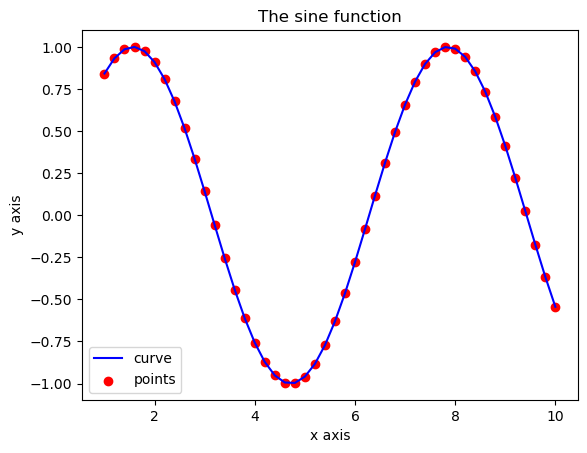

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [29]:
x = collect(1:0.2:10)
y = sin.(x)
plot(x, y, color="blue", label="curve")
scatter(x, y, color="red", label="points")
xlabel("x axis")
ylabel("y axis")
legend()
title("The sine function")
show()

### Optimization

The standard library for mathematical programming in Julia is called `JuMP`, a quick tutorial is available at https://jump.dev/JuMP.jl/stable/quickstart/.

### Miscellaneous

To  display the documentation (docstring) of a function, simply type `?` followed by its name in the REPL:

In [36]:
?length


search: length



```
length(collection) -> Integer
```

Return the number of elements in the collection.

Use [`lastindex`](@ref) to get the last valid index of an indexable collection.

# Examples

```jldoctest
julia> length(1:5)
5

julia> length([1, 2, 3, 4])
4

julia> length([1 2; 3 4])
4
```

---

```
length(A::AbstractArray)
```

Return the number of elements in the array, defaults to `prod(size(A))`.

# Examples

```jldoctest
julia> length([1, 2, 3, 4])
4

julia> length([1 2; 3 4])
4
```

---

```
length(s::AbstractString) -> Int
length(s::AbstractString, i::Integer, j::Integer) -> Int
```

The number of characters in string `s` from indices `i` through `j`. This is computed as the number of code unit indices from `i` to `j` which are valid character indices. With only a single string argument, this computes the number of characters in the entire string. With `i` and `j` arguments it computes the number of indices between `i` and `j` inclusive that are valid indices in the string `s`. In addition to in-bounds values, `i` may take the out-of-bounds value `ncodeunits(s) + 1` and `j` may take the out-of-bounds value `0`.

See also: [`isvalid`](@ref), [`ncodeunits`](@ref), [`lastindex`](@ref), [`thisind`](@ref), [`nextind`](@ref), [`prevind`](@ref)

# Examples

```jldoctest
julia> length("jμΛIα")
5
```


Comments start with `#`

In [ ]:
# this is a comment

Error messages can be generated using the following function. You can also throw and catch more sophisticated exceptions.

In [31]:
error("You made a serious mistake")

LoadError: You made a serious mistake

Functions that modify one or more of their arguments typically end with `!`:

In [32]:
function add_one!(x::Vector{Int})
    n = length(x)
    for i = 1:n
        x[i] += 1
    end
end

add_one! (generic function with 1 method)

The execution time of a function can be measured as follows:

In [33]:
using BenchmarkTools

In [34]:
Δt = @belapsed (M = rand(5, 5); N = M^2)

3.149377593360996e-7

The Julia equivalent of Python's `None` is called `nothing`. The constant `NaN` also exists in Julia, it has type `Float64`.

## 2. Linear recurrent sequences

In this problem, we go through different ways of computing the terms of the sequence 

\begin{align*}
    x_n & = w_1 x_{n-1} + ... + w_d x_{n-d}
\end{align*}

whose initial values are

\begin{align*}
    x_1 & = y_1 \\
    &~\vdots \\
    x_d & = y_d
\end{align*}

As you have surely noticed by now, Jupyter notebooks can also accomodate $\LaTeX$ code.

### 2.1 Recursive computation

Implement a function `x_rec(w::Vector{Float64}, y::Vector{Float64}, n::Int)::Float64` computing $x_n$ recursively.

Do not use it for $n > 30$ or your computer will explode.

In [50]:
function x_rec(w::Vector{Float64}, y::Vector{Float64}, n::Int)::Float64
    if n <= length(y)
        return y[n]
    end
    x_n = 0
    for i in 1:length(y)
        x_n = x_n + w[i] * x_rec(w, y, n-i)
    end
    return x_n
end

x_rec (generic function with 1 method)

In [53]:
@assert x_rec([1., 1.], [1., 1.], 10) ≈ 55.

x_rec([1., 1.], [1., 1.], 10)

55.0

Implement a function `x_loop` computing $x_n$ using a loop.

In [2]:
function x_loop(w::Vector{Float64}, y::Vector{Float64}, n::Int)::Float64
    x = Vector{Float64}(undef, n)
    d = length(w)
    x[1:min(d, n)] .= y[1:min(d, n)]
    for k = d+1:n
        x[k] = sum(w[i] * x[k-i] for i = 1:d)
    end
    return x[n]
end
        
        

x_loop (generic function with 1 method)

In [3]:
@assert x_loop([1., 1.], [1., 1.], 10) ≈ 55.

Implement a function `build_M` constructing the matrix
\begin{align*}
M = \begin{pmatrix}
0 & 1 & 0 & \cdots & & 0 \\
0 & 0 & 1 & 0 & \cdots & 0 \\
  & & \ddots & \ddots & \ddots & \vdots\\
\vdots & & &  0 & 1 & 0 \\
& & & & 0 & 1 \\
w_1 & w_2 &  & \cdots &  & w_d
\end{pmatrix}
\end{align*}

In [9]:
function build_M(w::Vector{Float64})::Matrix{Float64}
     d = length(w)
    M = zeros(Float64, d, d)
    for i = 1:d-1
        M[i, i+1] = 1.
    end
    M[end, :] .= w
    return M
end

build_M (generic function with 1 method)

In [10]:
@assert build_M([1., 2., 3.]) ≈ [0. 1. 0. ; 0. 0. 1. ; 1. 2. 3.]

Implement a function `x_pow` computing $x_n$ using the powers of $M$.

In [ ]:
@assert x_pow([1., 1.], [1., 1.], 10) ≈ 55.

Implement a function `pow_eigen` computing the powers of a matrix using its eigendecomposition, assuming it exists. You can compute it using the library `LinearAlgebra`.

In [ ]:
using LinearAlgebra

In [ ]:
randM = rand(3, 3)
@assert pow_eigen(randM + randM', 5) ≈ (randM + randM')^5

Implement a function `x_eigen` computing $x_n$ using the eigendecomposition of $M$.

In [ ]:
@assert x_eigen([1., 1.], [1., 1.], 10) ≈ 55.

Plot and the execution times of all your functions for various values of $n$. Conclude on the fastest approach.

In [8]:
1 == true

true

Bonus question: why do both methods using matrix powers have sublinear complexity?

## 3. Graph algorithms

### Data structure

Implement a weighted directed graph data structure called `Graph` where vertices are labelled from $1$ to $n$. Make sure that its attributes can be modified by putting the keyword `mutable` before `struct`.

In [11]:
mutable struct Graph
    n::Int
    adj::Vector{Vector{Int}}
    weights::Dict{Tuple{Int, Int}, Float64}
end

### Describing a graph

Implement a function `nv(G)` counting the vertices of a graph

In [ ]:
function nv(G::Graph)::Int
    return G.n
end

Implement a function `vertices(G)` listing the vertices of a graph

In [12]:
function vertices(G::Graph)::Vector{Int}
    V = collect(1:G.n)
    return V
end

vertices (generic function with 1 method)

Implement a function `has_edge(G, u, v)` checking whether edge $(u, v)$ exists

In [17]:
function has_edge(G::Graph, u::Int, v::Int)::Bool return(v in G.adj[u]) end
    

has_edge (generic function with 1 method)

Implement the functions `inneighbors(G, v)` and `outneighbors(G, u)`, which list the parents and children of a vertex respectively

In [18]:
function outneighbors(G::Graph, u::Int)::Vector{Int}
    return G.adj[u]
end

function inneighbors(G::Graph, v::Int)::Vector{Int}
    return [u for u in vertices(G) if has_edge(G, u, v)]
end

inneighbors (generic function with 1 method)

Implement a function `edges(G)` listing the edges of a graph

In [19]:
function edges(G::Graph)::Vector{Tuple{Int, Int}}
    E = collect((u, v) for u in vertices(G) for v in outneighbors(G, u))
    return E
end

edges (generic function with 1 method)

Implement a function `weight(G, u, v)` computing the weight of an arc

In [25]:
function weight(G::Graph, u::Int, v::Int)::Float64
    return G.weights[(u,v)]
end


weight (generic function with 1 method)

You can use the following function to plot a small graph:

In [21]:
import LightGraphs
using GraphPlot

function plot_graph(G::Graph)
    LG = LightGraphs.SimpleGraph(nb_vertices(G))
    for (u, v) in edges(G)
        add_edge!(LG, u, v)
    end
    plotg(LG, nodelabel=1:nv(LG))
end

┌ Info: Precompiling LightGraphs [093fc24a-ae57-5d10-9952-331d41423f4d]
└ @ Base loading.jl:1278
┌ Info: Precompiling GraphPlot [a2cc645c-3eea-5389-862e-a155d0052231]
└ @ Base loading.jl:1278


plot_graph (generic function with 1 method)

### Modifying a graph

Implement functions `add_vertex!(G)` and `add_edge!(G, u, v, weight)`.

In [28]:
function add_vertex!(G::Graph)
    G.n += 1
    push!(G.adj, Int[])
end

function add_edge!(G::Graph, u::Int, v::Int, weight::Float64)
    if not v in outneighbors(u)
        push!(G.adj[u],v)
    end
    G.weights[(u,v)]=weight
end

add_edge! (generic function with 1 method)

In [44]:
#Test de création d'un graphe

n = 2
adj_test = Vector{Vector{Int}}(undef, n)
w_test = Dict{Tuple{Int, Int}, Float64}

adj_test[1] = [2]
adj_test[2] = Int[]

w_test[(1,2)] = 5.


LoadError: MethodError: no method matching setindex!(::Type{Dict{Tuple{Int64,Int64},Float64}}, ::Float64, ::Tuple{Int64,Int64})

### Shortest paths

Implement the Ford-Bellman algorithm

Implement depth-first search and topological sorting within a function `dfs`

Implement Dijkstra's algorithm, either in a naive way or using the priority queue of `DataStructures`

### Spanning tree

Implement Kruskal's algorithm

### Flows and matchings

Implement the Edmunds-Karp algorithm, using edge weights as the capacities

Implement a function checking whether a graph is bipartite

Implement the Hungarian algorithm

### Test your functions on real graphs

## 4. Mathematical programming

Implement the LP formulation of the maximum flow problem

Implement the LP resolution method for the maximum spanning tree